## ETL

En este ETL vamos a ver los nulos y los outliers que tienen estos datos que se nos han proporcionados. Nuestra tarea es limpiar toda esta data para poder trabajar más cómodo en un futuro próximo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

*Dataset Internet.*

In [2]:
file_path = 'C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx'
xl = pd.ExcelFile(file_path)
print(xl.sheet_names)

['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']


1. Velocidad % por provincia.

In [3]:

df1 = pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Velocidad % por prov')

df1.isna().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Tratamientos de duplicados

In [4]:
# Mostrar las filas duplicadas
duplicados = df1[df1.duplicated()]
print(duplicados)


Empty DataFrame
Columns: [Año, Trimestre, Provincia, Mbps (Media de bajada)]
Index: []


In [5]:
# Eliminar duplicados
df1 = df1.drop_duplicates()



In [6]:
print(df1.describe())

               Año   Trimestre  Mbps (Media de bajada)
count   984.000000  984.000000              984.000000
mean   2018.634146    2.463415               23.186898
std       2.962686    1.128870               31.623977
min    2014.000000    1.000000                2.573729
25%    2016.000000    1.000000                4.762379
50%    2019.000000    2.000000                9.307228
75%    2021.000000    3.000000               27.636730
max    2024.000000    4.000000              234.440000


Ahora vamos a ver los outliers que tiene cada columna y si es necesario realizarles tratamientos a los datos.

C:\Users\User\AppData\Local\Temp\ipykernel_4672\3970511154.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)


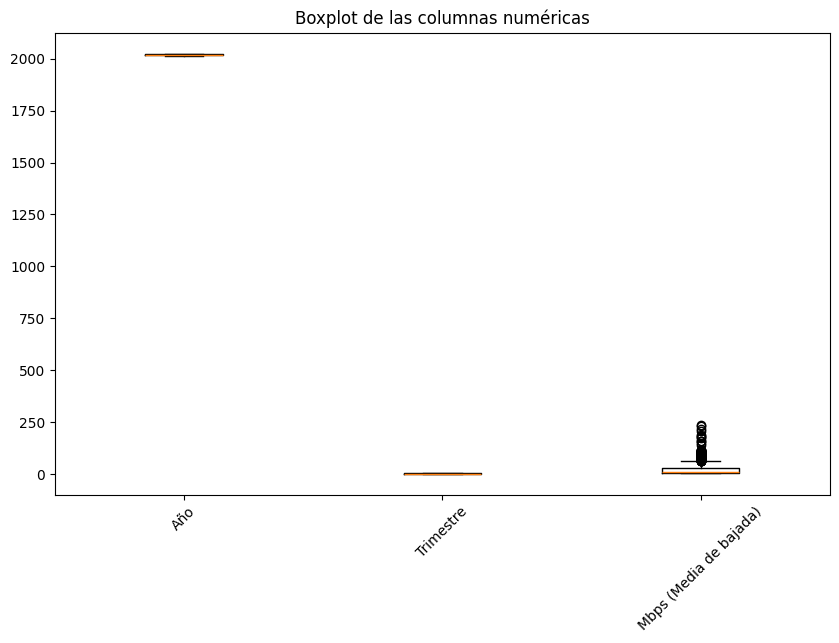

In [7]:
df_numerico = df1.drop(columns=['Provincia'])

# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

Vamos a tratar lo outilers de la columna Mbps

In [8]:
# Recalcular los cuantiles y el IQR
Q1 = df1['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df1['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = (df1['Mbps (Media de bajada)'] < lower_bound) | (df1['Mbps (Media de bajada)'] > upper_bound)

# Mostrar el número de outliers antes de la imputación
print(f"Número de outliers identificados: {outliers.sum()}")

Número de outliers identificados: 105


In [9]:
# Calcular la media de la columna sin outliers
mean_value = df1.loc[~outliers, 'Mbps (Media de bajada)'].mean()

# Mostrar la media calculada
print(f"Media calculada: {mean_value}")

# Reemplazar los valores outliers con la media
df1.loc[outliers, 'Mbps (Media de bajada)'] = mean_value

# Verificar los primeros registros para asegurarse de que los outliers han sido reemplazados
print("\nPrimeros registros después de la imputación:")
print(df1.head())

Media calculada: 13.952530981465015

Primeros registros después de la imputación:
    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          1     Buenos Aires               13.952531
1  2024          1  Capital Federal               13.952531
2  2024          1        Catamarca               13.952531
3  2024          1            Chaco               13.952531
4  2024          1           Chubut               20.500000


In [10]:

# Revisar estadísticas descriptivas del DataFrame después de la imputación
print("\nEstadísticas descriptivas del DataFrame después de la imputación:")
print(df1['Mbps (Media de bajada)'].describe())


Estadísticas descriptivas del DataFrame después de la imputación:
count    984.000000
mean      13.952531
std       12.525599
min        2.573729
25%        4.762379
50%        9.307228
75%       17.193466
max       61.000000
Name: Mbps (Media de bajada), dtype: float64


Exportamos para EDA

In [11]:
df1 = df1.to_csv('Velocidad por provincia.csv',index=False)

2. Totales Accesos por Tecnología.

In [12]:
df2= pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Totales Accesos Por Tecnología')

df2.isna().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           41 non-null     int64 
 1   Trimestre     41 non-null     int64 
 2   ADSL          41 non-null     int64 
 3   Cablemodem    41 non-null     int64 
 4   Fibra óptica  41 non-null     int64 
 5   Wireless      41 non-null     int64 
 6   Otros         41 non-null     int64 
 7   Total         41 non-null     int64 
 8   Periodo       41 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


Tratamientos de duplicados

In [14]:
# Mostrar las filas duplicadas
duplicados = df2[df2.duplicated()]
print(duplicados)


Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo]
Index: []


In [15]:
df2.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,41.000000,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,2.742682e+06,4.398940e+06,1.152858e+06,297246.780488,157362.390244,8.749089e+06
std,2.997967,1.142313,1.062552e+06,1.316336e+06,1.251751e+06,200464.379073,83211.380279,1.699043e+06
min,2014.000000,1.000000,7.744750e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.000000,1.950631e+06,3.124855e+06,1.698980e+05,85370.000000,70049.000000,7.206950e+06
50%,2019.000000,2.000000,3.132789e+06,4.435439e+06,6.370990e+05,276419.000000,178485.000000,8.648135e+06
75%,2021.000000,3.000000,3.714764e+06,5.826257e+06,1.566048e+06,492415.000000,247016.000000,1.008554e+07
max,2024.000000,4.000000,3.803024e+06,6.073426e+06,4.015101e+06,598682.000000,265328.000000,1.163316e+07


C:\Users\User\AppData\Local\Temp\ipykernel_4672\2662933414.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)


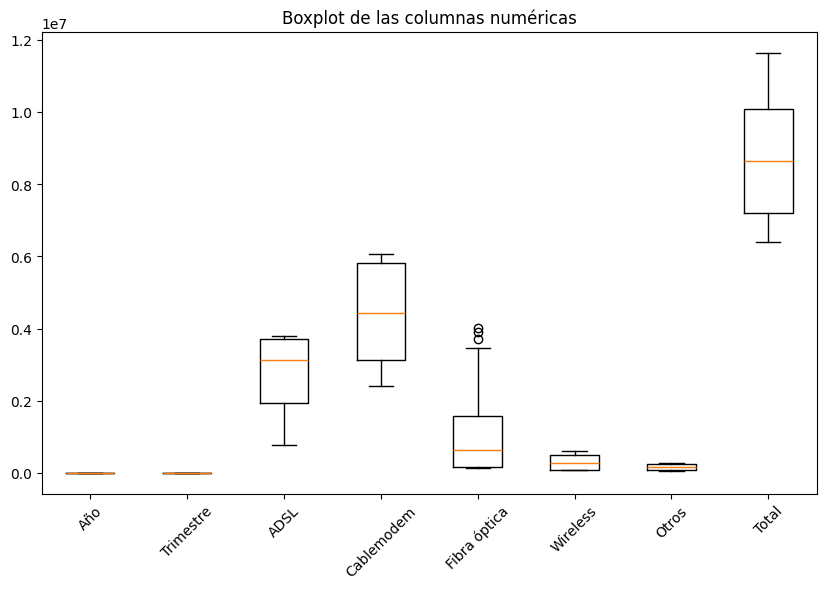

In [16]:
# Eliminar la columna 'Periodo' para graficar
df_numerico = df2.drop(columns=['Periodo'])

# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

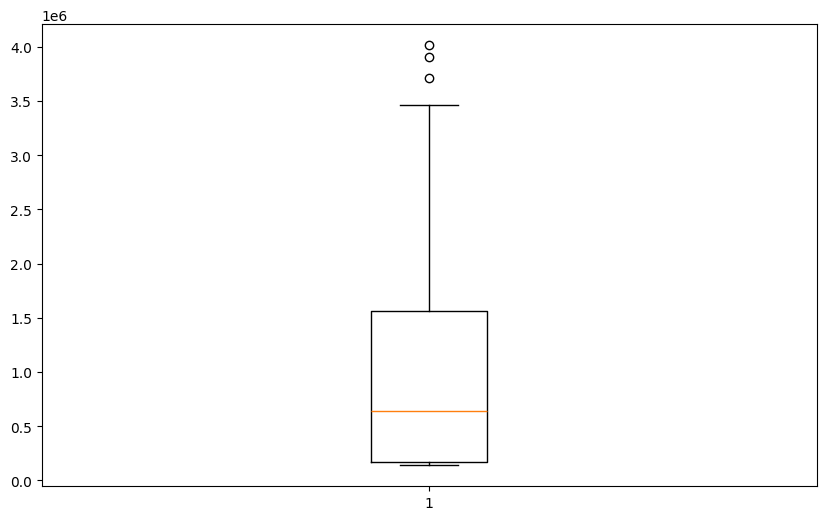

In [17]:
# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df2['Fibra óptica'])
plt.show()

En este caso Fibra óptima presenta outliers pero son tan pocos que no me afectan en nada practicamente. Así que voy a optar por dejarlos.

In [18]:
df2 = df2.to_csv('Totales Accesos por Tecnología.csv',index=False)

3. Accesos por Tecnología

Acá hago un replace porque en mi hoja original habían años que tenían este símbolo '*' y esto me podía afectar para futuras fórmulas.

In [19]:
df3= pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Accesos Por Tecnología')


df3['Año'] = df3['Año'].replace(to_replace='2019 *',value='2019')
df3['Trimestre']=df3['Trimestre'].replace(to_replace='3 *',value='3')
df3['Trimestre']=df3['Trimestre'].replace(to_replace='2 *',value='2')
df3['Trimestre']=df3['Trimestre'].replace(to_replace='1 *',value='1')
df3= df3.dropna(axis=0)


Tratamientos de duplicados

In [20]:
# Mostrar las filas duplicadas
duplicados = df3[df3.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []


In [21]:
df3.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,9.840000e+02,9.840000e+02,9.840000e+02,984.000000,984.000000,9.840000e+02
mean,1.150317e+05,1.832892e+05,4.728246e+04,12385.282520,6556.766260,3.645454e+05
std,2.385989e+05,4.500403e+05,1.762796e+05,20996.226278,11567.922012,7.847271e+05
min,2.827000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2.076400e+04,1.085600e+04,3.540000e+02,734.000000,332.000000,6.177975e+04
50%,4.452300e+04,4.014950e+04,2.581000e+03,5105.500000,1901.000000,1.124190e+05
75%,9.148125e+04,7.582350e+04,2.554050e+04,14034.750000,7546.500000,1.927940e+05
max,1.586343e+06,2.797700e+06,1.799013e+06,150290.000000,101294.000000,5.044557e+06


C:\Users\User\AppData\Local\Temp\ipykernel_4672\1362306334.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)


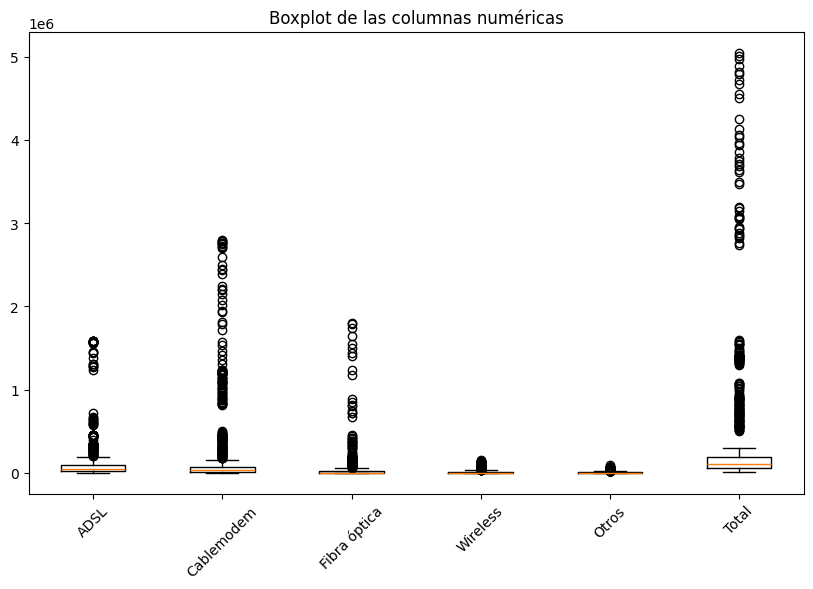

In [22]:
# Eliminar la columna 'Periodo' para graficar
df_numerico = df3.drop(columns=['Año','Trimestre','Provincia'])

# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

Como se puede ver en este gráfico boxplot todas las columnas tienen outliers. Creo que la mejor opción en este caso es utilizar RobustScaler. Yo creo que es lo más adecuado porque no tengo datos nulos y además es menos sensible a los outliers ya que utiliza la mediana y los percentiles, lo cual puede reducir el impacto de los valores extremos.

De igual modo tuve que forzar algunos valores a 0. Esto es porque si los dejaba con RobustScaler obtenía datos que eran negativos (y no tiene sentido que sean negativos cuando se habla de velocidad de internet).

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
# Escalar con RobustScaler

# Seleccionamos solo las columnas numéricas
numerical_cols = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

# Creamos una instancia de RobustScaler
scaler = RobustScaler()

df_scaled = df3.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df3[numerical_cols])

# Forzar valores negativos a cero
df_scaled[numerical_cols] = df_scaled[numerical_cols].clip(lower=0)

# Revisamos el resultado
print(df_scaled.describe())


             ADSL  Cablemodem  Fibra óptica    Wireless       Otros  \
count  984.000000  984.000000    984.000000  984.000000  984.000000   
mean     1.159831    2.399976      1.815266    0.685233    0.740778   
std      3.311865    6.854464      6.988324    1.508595    1.554801   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      0.000000    0.000000      0.000000    0.000000    0.000000   
50%      0.001350    0.000058      0.000000    0.000658    0.001317   
75%      0.664028    0.549105      0.911580    0.671334    0.782521   
max     21.802601   42.445076     71.325194   10.915512   13.776838   

            Total  
count  984.000000  
mean     2.115053  
std      5.916740  
min      0.000000  
25%      0.000000  
50%      0.000702  
75%      0.613483  
max     37.645813  


In [25]:
df_scaled['ADSL'].value_counts()

ADSL
0.000000    492
0.058642      9
0.012076      2
0.051444      2
1.621839      2
           ... 
1.198859      1
0.027999      1
1.157016      1
0.077718      1
3.677462      1
Name: count, Length: 470, dtype: int64

In [26]:
df3 = df_scaled.to_csv('Accesos por Tecnología.csv',index=False)

4. Totales Dial-BAf

In [27]:
df4= pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Totales Dial-BAf')

df4.isna().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

Tratamientos de duplicados

In [28]:
# Mostrar las filas duplicadas
duplicados = df4[df4.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Banda ancha fija, Dial up, Total, Periodo]
Index: []


In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               41 non-null     int64 
 1   Trimestre         41 non-null     int64 
 2   Banda ancha fija  41 non-null     int64 
 3   Dial up           41 non-null     int64 
 4   Total             41 non-null     int64 
 5   Periodo           41 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_4672\1887832771.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)


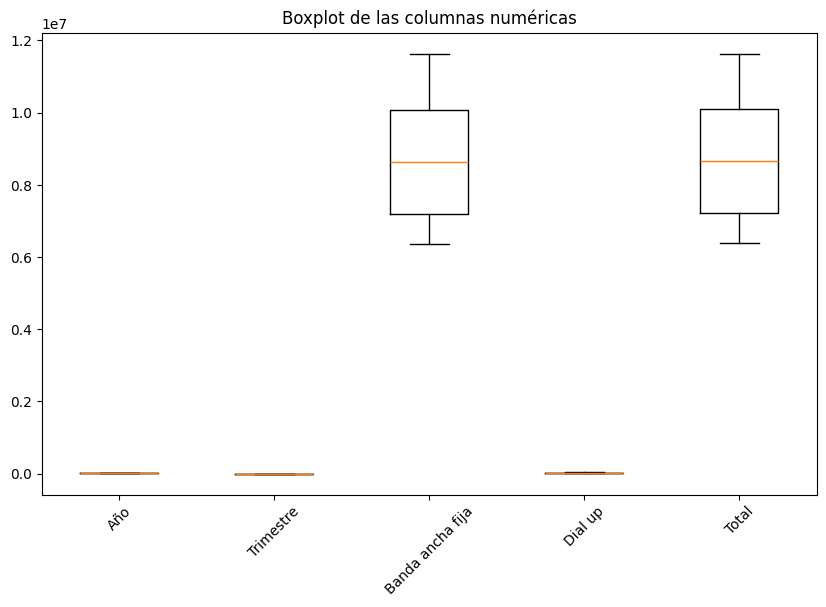

In [30]:
# Eliminar la columna 'Periodo' para graficar
df_numerico = df4.drop(columns=['Periodo'])

# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

No se presentan outliers

In [31]:
df4 = df4.to_csv('Dial-BAf.csv',index=False)

5. Penetracion-totales.

In [32]:
df5= pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Penetracion-totales')

df5.isna().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

Tratamientos de duplicados

In [33]:
# Mostrar las filas duplicadas
duplicados = df5[df5.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab, Periodo]
Index: []


In [34]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos por cada 100 hogares  41 non-null     float64
 3   Accesos por cada 100 hab      41 non-null     float64
 4   Periodo                       41 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_4672\348385369.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)


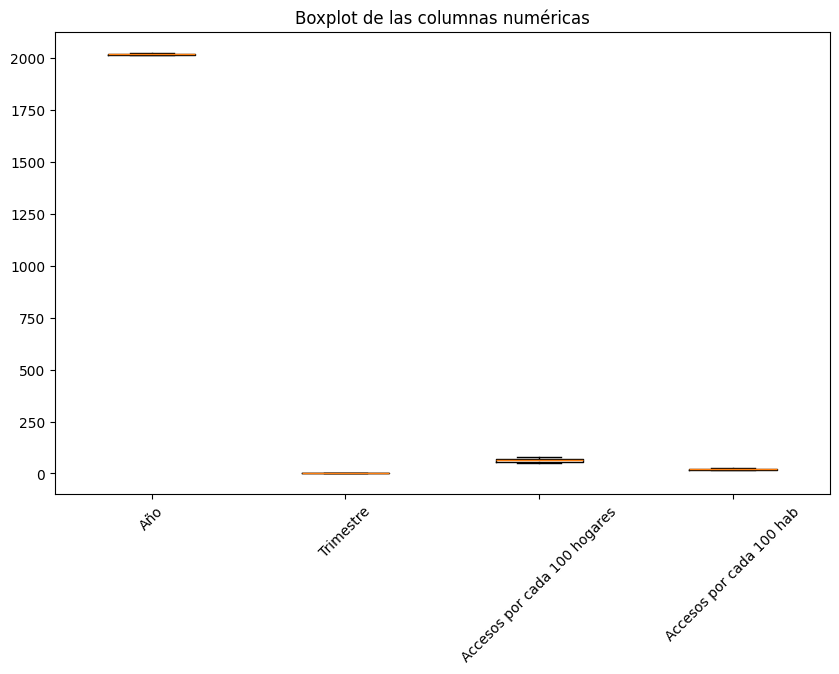

In [35]:
# Eliminar la columna 'Periodo' para graficar
df_numerico = df5.drop(columns=['Periodo'])

# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

No se presentan outliers

In [36]:
df5 = df5.to_csv('Penetracion-Totales.csv',index=False)

6. Totales Accesos por velocidad

In [37]:
df6= pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Totales Accesos por velocidad')

df6.isna().sum()

Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64

Tratamientos de duplicados

In [38]:
# Mostrar las filas duplicadas
duplicados = df6[df6.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Hasta 512 kbps, Entre 512 Kbps y 1 Mbps, Entre 1 Mbps y 6 Mbps, Entre 6 Mbps y 10 Mbps, Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS, Total]
Index: []


In [39]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      41 non-null     int64
 1   Trimestre                41 non-null     int64
 2   Hasta 512 kbps           41 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  41 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    41 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   41 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  41 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  41 non-null     int64
 8   Más de 30 Mbps           41 non-null     int64
 9   OTROS                    41 non-null     int64
 10  Total                    41 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


C:\Users\User\AppData\Local\Temp\ipykernel_4672\1147734150.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df6[col] for col in df6.columns], labels=df6.columns)


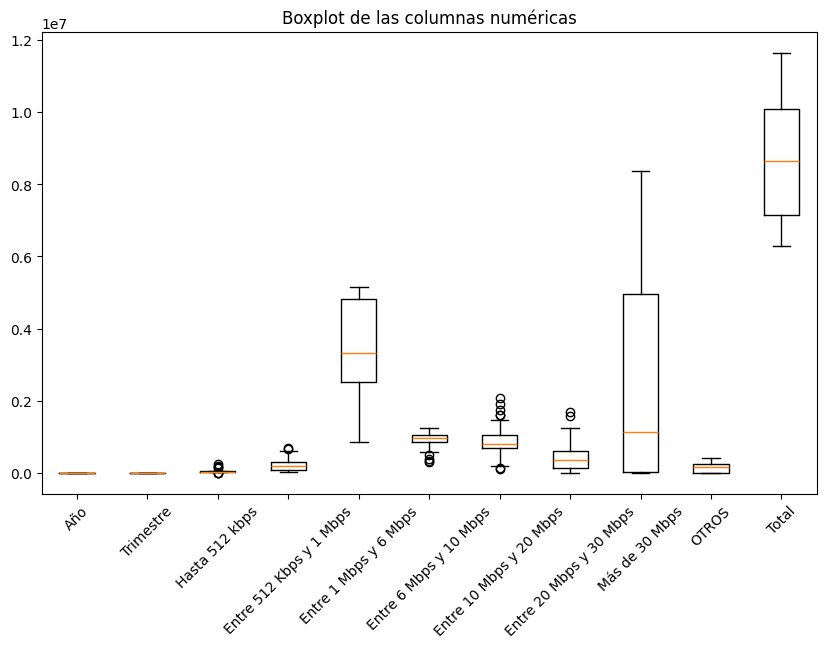

In [40]:
# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df6[col] for col in df6.columns], labels=df6.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

A decir verdad voy a dejar estos outliers.No representan un peligro como en datos anteriores que eran muy notorios y excesivos.

In [41]:
df6= df6.to_csv('Totales Accesos por Velocidad.csv',index=False)

7. Accesos por velocidad.

In [42]:
df7= pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Accesos por velocidad')

df7.isna().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [43]:
df7 = df7.dropna(subset=['OTROS'])


Tratamientos de duplicados

In [44]:
# Mostrar las filas duplicadas
duplicados = df7[df7.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Provincia, HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps, OTROS, Total]
Index: []


In [45]:
df7.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,978.000000,978.000000,978.000000,978.00000,9.780000e+02,978.000000,978.000000,978.000000,9.780000e+02,978.000000,9.780000e+02
mean,2018.656442,2.466258,1979.014315,9187.00818,1.348622e+05,38195.466258,37015.957055,19882.338446,1.159074e+05,6267.931493,3.632972e+05
std,3.011504,1.131745,12795.260845,20849.51674,3.254977e+05,64389.786285,88758.064827,69416.840262,4.514186e+05,14923.597928,7.824756e+05
min,2014.000000,1.000000,6.000000,0.00000,1.336000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,44.250000,395.00000,2.412100e+04,3661.500000,2380.750000,40.000000,1.125000e+01,0.000000,6.135375e+04
50%,2019.000000,2.000000,107.000000,2235.00000,4.285500e+04,13156.000000,10178.500000,1573.000000,3.308500e+03,165.500000,1.109070e+05
75%,2021.000000,3.000000,468.000000,7040.50000,8.389300e+04,41242.000000,26442.000000,10026.750000,3.937775e+04,6617.250000,1.914005e+05
max,2024.000000,4.000000,238920.000000,171244.48000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125147.000000,5.044557e+06


C:\Users\User\AppData\Local\Temp\ipykernel_4672\1892215786.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)


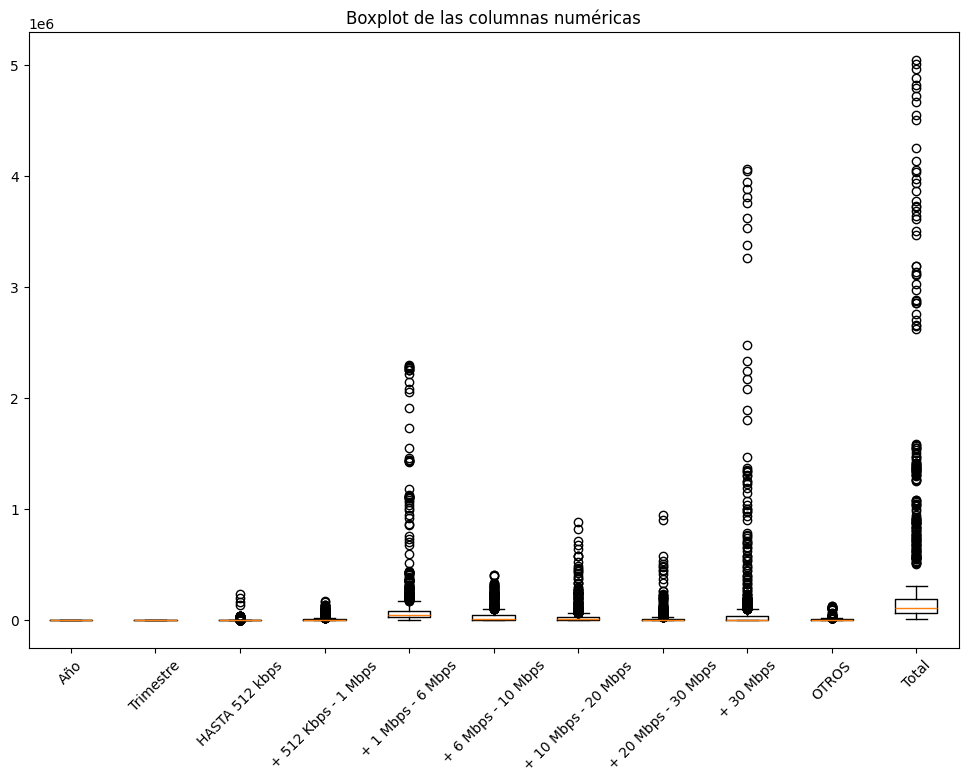

In [46]:
# Eliminar la columna 'Periodo' para graficar
df_numerico = df7.drop(columns=['Provincia'])

# Crear un gráfico de boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

En este caso si me parece demasiado excesivo la cantidad de outliers que presentan estos datos. En este caso si es debido hacerles un tratamiento.

In [47]:
# Escalar con RobustScaler

# Seleccionamos solo las columnas numéricas
numerical_cols = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

# Escalar con RobustScaler
df_scaled = df7.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df7[numerical_cols])

# Forzar valores negativos a cero
df_scaled[numerical_cols] = df_scaled[numerical_cols].clip(lower=0)

# Revisamos el resultado
print(df_scaled.describe())

               Año   Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
count   978.000000  978.000000      978.000000           978.000000   
mean   2018.656442    2.466258        4.490945             1.167810   
std       3.011504    1.131745       30.184275             3.088612   
min    2014.000000    1.000000        0.000000             0.000000   
25%    2016.000000    1.000000        0.000000             0.000000   
50%    2019.000000    2.000000        0.000000             0.000677   
75%    2021.000000    3.000000        0.851917             0.723121   
max    2024.000000    4.000000      563.570501            25.432169   

       + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
count         978.000000          978.000000           978.000000   
mean            1.692704            0.785379             1.258323   
std             5.393954            1.651900             3.635663   
min             0.000000            0.000000             0.000000   
25%            

In [48]:
df7 = df_scaled.to_csv('Accesos por Velocidad.csv',index=False)

8. Ingresos

In [49]:
df8= pd.read_excel('C:\\Users\\User\\OneDrive\\Escritorio\\Datasets Telecomunicaciones\\Internet.xlsx',sheet_name='Ingresos ')

df8.isna().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

Tratamientos de duplicados

In [50]:
# Mostrar las filas duplicadas
duplicados = df8[df8.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Ingresos (miles de pesos), Periodo]
Index: []


In [51]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_4672\567002942.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)


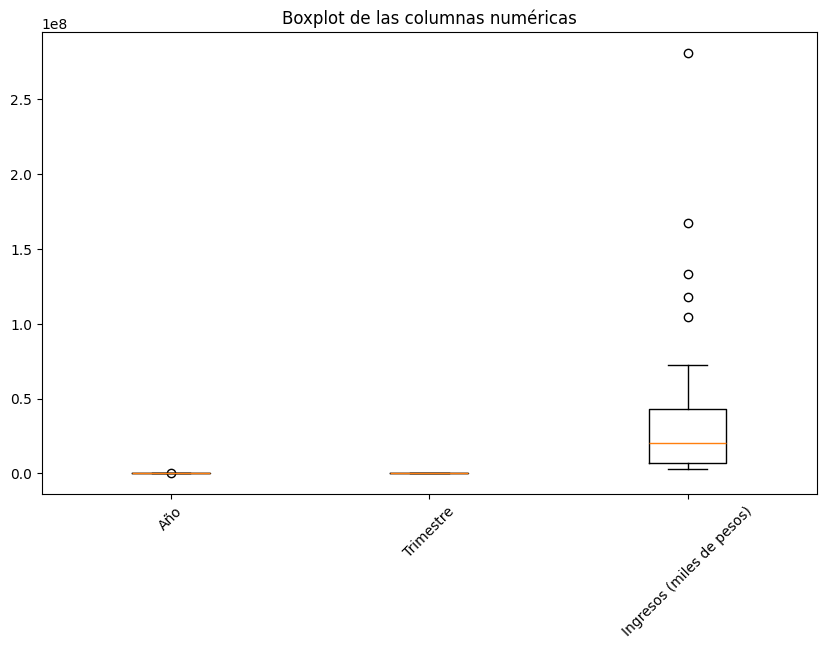

In [52]:
# Eliminar la columna 'Periodo' para graficar
df_numerico = df8.drop(columns=['Periodo'])

# Crear un gráfico de boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_numerico[col] for col in df_numerico.columns], labels=df_numerico.columns)
plt.xticks(rotation=45)
plt.title('Boxplot de las columnas numéricas')
plt.show()

No presenta outliers a excepción de Año pero como es uno solo lo voy a dejar nomás.

In [53]:
df8 = df8.to_csv('Ingresos.csv',index=False)